In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('data/training.csv')
df.head()

,motion_state,axdt_sum,aydt_sum,azdt_sum,gxdt_sum,gydt_sum,gzdt_sum,adt_sum,gdt_sum,axdt_var,...,adt_min,gdt_min,axdt_max,aydt_max,azdt_max,gxdt_max,gydt_max,gzdt_max,adt_max,gdt_max
0,rest,0.208844,0.078495,9.493337,-0.001675,0.001102,-0.001176,9.498792,0.008515,0.000004,...,0.093785,0.000026,0.005700,0.002976,0.101778,0.000119,0.000115,0.000103,0.101785,0.000171
1,rest,0.211935,0.086485,9.794426,-0.001977,0.000370,-0.000462,9.799902,0.008413,0.000004,...,0.094010,0.000015,0.005566,0.002930,0.101622,0.000137,0.000131,0.000090,0.101634,0.000167
2,rest,0.214289,0.083671,9.786784,-0.001740,0.000793,-0.001662,9.792245,0.009893,0.000004,...,0.093513,0.000010,0.005701,0.002926,0.101971,0.000110,0.000191,0.000181,0.101982,0.000219
3,rest,0.218394,0.083838,9.791271,-0.002218,0.001297,-0.001483,9.796759,0.009319,0.000004,...,0.093461,0.000017,0.005728,0.002998,0.102332,0.000101,0.000179,0.000102,0.102362,0.000206
4,rest,0.222900,0.259758,9.795122,-0.000059,0.001148,-0.001739,9.806574,0.009778,0.000003,...,0.093818,0.000032,0.005978,0.010632,0.102123,0.000207,0.000126,0.000130,0.102166,0.000213


In [44]:
y = df['motion_state'].copy()
X = df[[col for col in df.columns if col !='motion_state']].copy()
X.head()
y.head()

0    rest
1    rest
2    rest
3    rest
4    rest
Name: motion_state, dtype: object

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [47]:
param_grid_RFC ={
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [10, 50, 100, 150],
        'classifier__max_depth': [ 2, 3, 5]
    }

param_grid_GBC={
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [10, 50, 100, 150],
        'classifier__max_depth': [ 2, 3, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]
    }


In [48]:
pipe_RFC = Pipeline([('classifier',RandomForestClassifier())])

In [49]:
grid_RFC = GridSearchCV(pipe_RFC, param_grid_RFC, cv=5, return_train_score=True)
grid_RFC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier': [RandomForestClassifier(max_depth=2,
                                                               random_state=42)],
                         'classifier__max_depth': [2, 3, 5],
                         'classifier__n_estimators': [10, 50, 100, 150]},
             return_train_score=True)

In [50]:
print("Random Forest Classifier :")
print("Best parameters:\n{}\n".format(grid_RFC.best_params_))
print("Best CV train score: {:.2f}".format(grid_RFC.cv_results_['mean_train_score'][grid_RFC.best_index_]))
print("Best CV validation score: {:.2f}".format(grid_RFC.best_score_))
print("Test set score: {:.2f}".format(grid_RFC.score(X_test, y_test)))

Random Forest Classifier :
Best parameters:
{'classifier': RandomForestClassifier(max_depth=2, random_state=42), 'classifier__max_depth': 2, 'classifier__n_estimators': 100}

Best CV train score: 0.95
Best CV validation score: 0.93
Test set score: 0.85


In [51]:
pipe_GBC = Pipeline([('classifier',GradientBoostingClassifier())])

In [52]:
grid_GBC = GridSearchCV(pipe_GBC, param_grid_GBC, cv=5, return_train_score=True)
grid_GBC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier': [GradientBoostingClassifier(max_depth=5,
                                                                   n_estimators=50,
                                                                   random_state=42)],
                         'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'classifier__max_depth': [2, 3, 5],
                         'classifier__n_estimators': [10, 50, 100, 150]},
             return_train_score=True)

In [53]:
print("Gradient Boost Classifier :")
print("Best params:\n{}\n".format(grid_GBC.best_params_))
print("Best cross-validation train score: {:.6f}".format(grid_GBC.cv_results_['mean_train_score'][grid_GBC.best_index_]))
print("Best cross-validation validation score: {:.6f}".format(grid_GBC.best_score_))
print("Test-set score: {:.6f}".format(grid_GBC.score(X_test, y_test)))

Gradient Boost Classifier :
Best params:
{'classifier': GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 50}

Best cross-validation train score: 1.000000
Best cross-validation validation score: 0.950150
Test-set score: 0.833333


In [54]:
df2 = pd.read_csv('data/testing.csv')

In [55]:
y2 = df2['motion_state'].copy()
X2 = df2[[col for col in df.columns if col !='motion_state']].copy()

In [56]:
print("Test-set score RandomForest : {:.6f}".format(grid_RFC.score(X2, y2)))
print("Test-set score GradientBoost : {:.6f}".format(grid_GBC.score(X2, y2)))

Test-set score RandomForest : 0.960000
Test-set score GradientBoost : 0.900000


In [57]:
df['motion_state'].unique()

array(['rest', 'turn', 'straight'], dtype=object)

In [58]:
grid_RFC.fit(X_train, y_train)
pred_val = grid_RFC.predict(X_test)

In [59]:
grid_GBC.fit(X_train, y_train)
pred_val_GBC = grid_GBC.predict(X_test)

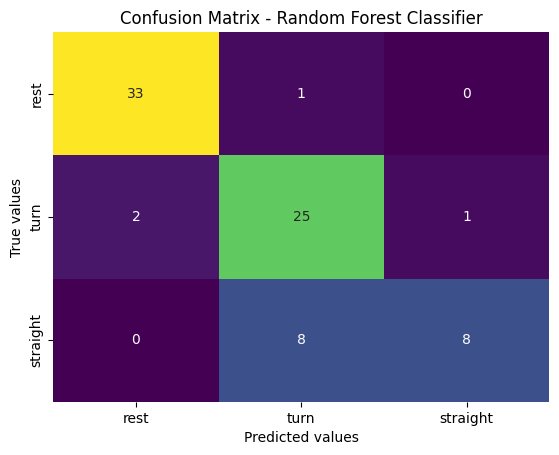


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        rest       0.94      0.97      0.96        34
    straight       0.74      0.89      0.81        28
        turn       0.89      0.50      0.64        16

    accuracy                           0.85        78
   macro avg       0.86      0.79      0.80        78
weighted avg       0.86      0.85      0.84        78


Accuracy Score: 0.8461538461538461
Precision Score: 0.8556800497976967
Recall Score: 0.7878151260504201
F1 Score: 0.8009911173445535


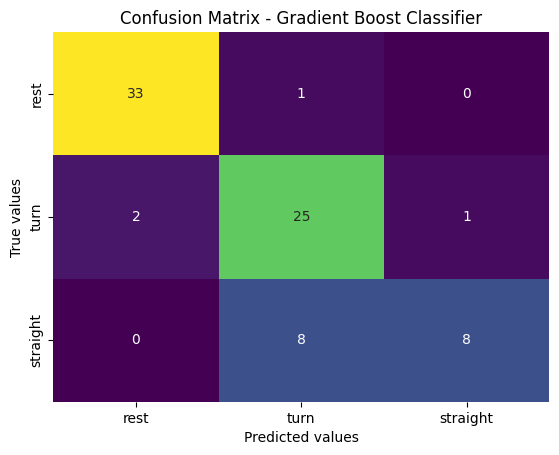


Classification Report for Gradient Boost Classifier:
              precision    recall  f1-score   support

        rest       0.94      0.97      0.96        34
    straight       0.74      0.89      0.81        28
        turn       0.89      0.50      0.64        16

    accuracy                           0.85        78
   macro avg       0.86      0.79      0.80        78
weighted avg       0.86      0.85      0.84        78


Accuracy Score: 0.8461538461538461
Precision Score: 0.8556800497976967
Recall Score: 0.7878151260504201
F1 Score: 0.8009911173445535


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification(true_values, predicted_values, ticklabels, model):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(true_values, predicted_values)
    
    # Plot heatmap
    sns.heatmap(confusion_mat, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='d', cbar=False, cmap='viridis')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

    # Calculate scores
    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values, average='macro')
    recall = recall_score(true_values, predicted_values, average='macro')
    f1 = f1_score(true_values, predicted_values, average='macro')

    '''# Calculate additional metrics
    tn, fp, fn, tp = confusion_mat.ravel()

    # Print additional metrics
    print("Metrics for", model)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)
    print("True Positives:", tp)'''

    # Print classification report
    print("\nClassification Report for", model + ":")
    print(classification_report(true_values, predicted_values))

    # Print scores
    print("\nAccuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1 Score:", f1)
    

evaluate_classification(y_test, pred_val, ['rest', 'turn', 'straight'], 'Random Forest Classifier')
evaluate_classification(y_test, pred_val, ['rest', 'turn', 'straight'], 'Gradient Boost Classifier')

